<a href="https://colab.research.google.com/github/bcolorado/ML-course/blob/main/Copia_de_LAB_05_02_MODEL_EVALUATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/fagonzalezo/ai4eng-unal/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as bcolorado@unal.edu.co... please wait
using course session ai4eng.v1.unal::intro_si_2024_1
success!! you are logged in


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 64, 91,  8, 71],
       [ 2, 38, 32, 39, 44],
       [ 3,  8, 10, 53, 65],
       [ 4, 62, 39, 16, 23],
       [ 5, 83, 29, 93, 21],
       [ 6, 42, 52, 65,  3],
       [ 7, 73,  0, 35, 97],
       [ 8, 34, 52, 11, 77],
       [ 9, 91, 28, 63,  2],
       [10, 73, 50, 51, 41],
       [11, 30, 95, 37, 93],
       [12, 63,  6, 48, 38],
       [13, 91,  1, 88, 31],
       [14, 62, 50, 83,  5],
       [15, 84, 49, 21, 59],
       [16, 28, 23, 25, 84],
       [17, 75, 63,  8, 32],
       [18, 39, 43, 61, 32],
       [19, 86, 37, 81, 58]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 38, 32, 39, 44],
       [ 4, 62, 39, 16, 23],
       [ 5, 83, 29, 93, 21]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [64,  8],
       [38, 39],
       [ 8, 53],
       [62, 16],
       [83, 93],
       [42, 65],
       [73, 35],
       [34, 11],
       [91, 63],
       [73, 51],
       [30, 37],
       [63, 48],
       [91, 88],
       [62, 83],
       [84, 21],
       [28, 25],
       [75,  8],
       [39, 61],
       [86, 81]])

In [ ]:
x[ridxs][:, cidxs]

array([[38, 39],
       [62, 16],
       [83, 93]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 64, 91,  8, 71],
       [ 2, 38, 32, 39, 44]])

In [ ]:
x[3:]

array([[ 3,  8, 10, 53, 65],
       [ 4, 62, 39, 16, 23],
       [ 5, 83, 29, 93, 21],
       [ 6, 42, 52, 65,  3],
       [ 7, 73,  0, 35, 97],
       [ 8, 34, 52, 11, 77],
       [ 9, 91, 28, 63,  2],
       [10, 73, 50, 51, 41],
       [11, 30, 95, 37, 93],
       [12, 63,  6, 48, 38],
       [13, 91,  1, 88, 31],
       [14, 62, 50, 83,  5],
       [15, 84, 49, 21, 59],
       [16, 28, 23, 25, 84],
       [17, 75, 63,  8, 32],
       [18, 39, 43, 61, 32],
       [19, 86, 37, 81, 58]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([114, 106, 107, 119, 116, 104, 112, 111, 108, 110, 109, 100, 101,
       103, 118, 105, 113, 115, 117, 102])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([12,  4,  8,  7,  1,  6, 15,  2,  9,  5, 14, 11, 13, 17,  3, 16,  0,
       10, 19, 18])

how do you interpret this?

In [ ]:
v[p[5:]]

array([106, 115, 102, 109, 105, 114, 111, 113, 117, 103, 116, 100, 110,
       119, 118])

In [ ]:
x[p[:5]]

array([[12, 63,  6, 48, 38],
       [ 4, 62, 39, 16, 23],
       [ 8, 34, 52, 11, 77],
       [ 7, 73,  0, 35, 97],
       [ 1, 64, 91,  8, 71]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [ ]:
def split_data(X, y, pct):
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    n=len(X)
    permutation = np.random.randint(0,n-1)
    n1_elements = int(n*pct)
    permutation_partition_1 =n1_elements
    X1 = X[:permutation_partition_1]
    X2 = X[permutation_partition_1:]
    y1 = y[:permutation_partition_1]
    y2 = y[permutation_partition_1:]
    return X1, X2, y1, y2

check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 37 31 26 44 56 85 99]
 [ 2 79 58 50 48 49 50  8]
 [ 3 83 60 85 61 73 50 11]
 [ 4 75 19 27 83 27 39 17]
 [ 5 91 68 54  7  6 45 46]
 [ 6 64 59 37 10 46 83 89]
 [ 7 31 87 90 73 44 23 97]
 [ 8 69 79 90 53 46 92 14]
 [ 9 91 15  7 86 72 79 82]
 [10 11 36 37 71  1 56 73]
 [11  8  4 36 45 17  7 64]
 [12 27 41 67 17 47 86  7]
 [13 95 87 88 67 23 18 91]
 [14 84 11 13 88 80 32 68]
 [15  1 93 21 88 49 12 39]
 [16 42 80 59 67 57 90 96]
 [17 86 16 48 68 12 76 54]
 [18 41 66 68 70 34 82 67]
 [19 74 29 22 14 87 65 80]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(7229, 7229, 2190, 2190)

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 0  1  2  3  4  5  6  7]
 [ 1 37 31 26 44 56 85 99]
 [ 2 79 58 50 48 49 50  8]
 [ 3 83 60 85 61 73 50 11]
 [ 4 75 19 27 83 27 39 17]
 [ 5 91 68 54  7  6 45 46]
 [ 6 64 59 37 10 46 83 89]
 [ 7 31 87 90 73 44 23 97]
 [ 8 69 79 90 53 46 92 14]
 [ 9 91 15  7 86 72 79 82]
 [10 11 36 37 71  1 56 73]
 [11  8  4 36 45 17  7 64]
 [12 27 41 67 17 47 86  7]
 [13 95 87 88 67 23 18 91]] 
--
[[14 84 11 13 88 80 32 68]
 [15  1 93 21 88 49 12 39]
 [16 42 80 59 67 57 90 96]
 [17 86 16 48 68 12 76 54]
 [18 41 66 68 70 34 82 67]
 [19 74 29 22 14 87 65 80]] 
--
[100 101 102 103 104 105 106 107 108 109 110 111 112 113] 
--
[114 115 116 117 118 119] 
--


In [ ]:
Xts

array([[14, 84, 11, 13, 88, 80, 32, 68],
       [15,  1, 93, 21, 88, 49, 12, 39],
       [16, 42, 80, 59, 67, 57, 90, 96],
       [17, 86, 16, 48, 68, 12, 76, 54],
       [18, 41, 66, 68, 70, 34, 82, 67],
       [19, 74, 29, 22, 14, 87, 65, 80]])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

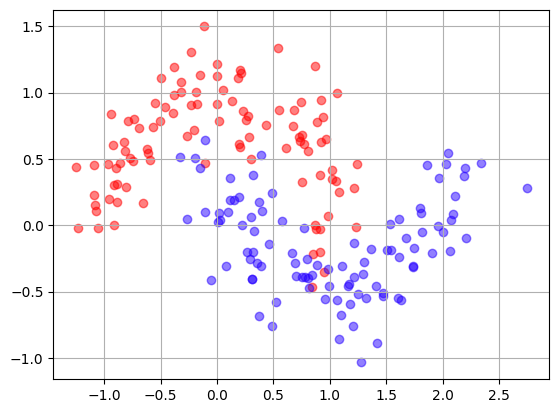

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.43005, 0.56995)

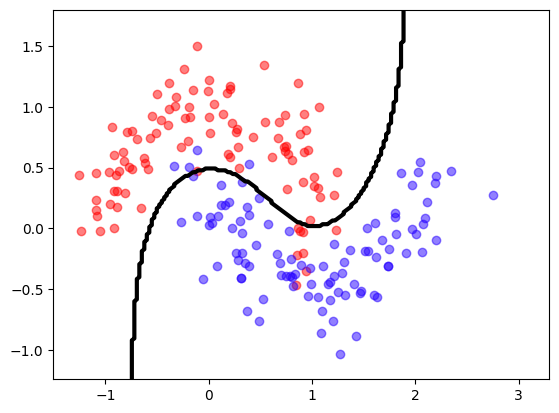

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"
    n_samples = len(X)
    X_first_half, X_second_half = X[:n_samples//2], X[n_samples//2:]
    y_first_half, y_second_half = y[:n_samples//2], y[n_samples//2:]
    estimator.fit(X_first_half, y_first_half)
    y_pred = estimator.predict(X_second_half)
    return estimator, y_pred

check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[3 1 8 9 4 2 6 3 1 3 8 4 8 1 2]


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True False False  True  True False  True  True  True False  True
 False  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
y[y_less_than_5]

array([3, 1, 4, 2, 3, 1, 3, 4, 1, 2])

In [ ]:
y[y<5]

array([3, 1, 4, 2, 3, 1, 3, 4, 1, 2])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([12,  3, 17, 12,  9, 10, 19,  3, 16,  6,  4,  4, 13, 11,  0])

In [ ]:
v[y<5]

array([12,  3,  9, 10,  3, 16,  6,  4, 11,  0])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    X1 = []
    X2 = []
    for i in range(len(y)):
      if y[i]==0:
        X1.append(X[i])
      else:
        X2.append(X[i])
    return np.array(X1), np.array(X2)

check manually your code

In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:

def accuracy(y_true, y_pred):
  result=sum(y_true==y_pred)/len(y_true)
  return result

In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:
def split_fit_predict(estimator, X, y,train_pct):
    def split_data(X, y, pct):
      assert len(X)==len(y), "X and y must have the same length"
      assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
      n=len(X)
      permutation = np.random.randint(0,n-1)
      n1_elements = int(n*pct)
      permutation_partition_1 =n1_elements
      X1 = X[:permutation_partition_1]
      X2 = X[permutation_partition_1:]
      y1 = y[:permutation_partition_1]
      y2 = y[permutation_partition_1:]
      return X1, X2, y1, y2
    def accuracy(y_true, y_pred):
      result=sum(y_true==y_pred)/len(y_true)
      return result
    X_train, X_test, y_train, y_test = split_data(X, y, train_pct)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    accuracy = accuracy(y_test, y_pred)
    return estimator, X_test, y_test, accuracy



In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 0.60704603, -0.24606463],
        [-1.27253382, -0.22661941],
        [ 0.18657578,  1.00579852],
        [ 1.12627105,  0.12046613],
        [ 0.11244185, -0.23569339],
        [ 1.69091862,  0.01372576],
        [ 1.3310641 , -0.0424417 ],
        [ 0.06375446,  0.94736997],
        [ 0.47755703, -0.09386073],
        [-0.19439936,  0.83750239]]),
 array([1, 0, 0, 0, 1, 1, 1, 0, 1, 0]),
 0.9)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
